### TAREFA

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [594]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [595]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [596]:
# Analisar a composição das variáveis e verificar se as variáveis Survived e Sex possuem dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [597]:
# Verificar Total de nulos por variável
print("\nTotal de nulos por variável:\n", df.isnull().sum().sort_values(ascending=False))


Total de nulos por variável:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [598]:
# Entendo a composição das variáveis que serão relacionadas
df.Sex[:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [599]:
df.Survived[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [600]:
# Análise de frequência
# Tabela de frequência para a variável SEXO:

tbl_freq_sex = pd.DataFrame(df.Sex.value_counts())
tbl_freq_sex.rename(columns = {'Sex':'freq_abs_sex'}, inplace = True)
tbl_freq_sex['freq_relativa_sex'] = round(tbl_freq_sex.freq_abs_sex / tbl_freq_sex.freq_abs_sex.sum(),2)
tbl_freq_sex

,freq_abs_sex,freq_relativa_sex
male,577,0.65
female,314,0.35


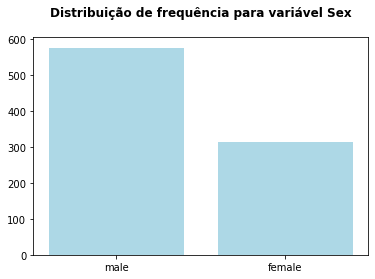

In [601]:
# Gráfico de barras para verificar a distribuição de frequência para variável Sex

plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'lightblue')
plt.title('Distribuição de frequência para variável Sex\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

In [602]:
# Probabilidade de sobreviver no geral:
print('\nFrequência relativa de cada possível valor / Probabilidade de sobreviver no geral:\n', 
      round(df.Survived.value_counts()/df.Survived.shape[0],2))


Frequência relativa de cada possível valor / Probabilidade de sobreviver no geral:
 0    0.62
1    0.38
Name: Survived, dtype: float64


In [603]:
# probabilidade de sobreviver, sendo homem/mulher

prob_h = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_m = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", round(prob_h*100), "%")
print("Probabilidade de sobreviver sendo mulher:", round(prob_m*100), "%")

# É provável então que exista grande correlação entre ter sobrevivido e o sexo.

Probabilidade de sobreviver sendo homem: 19 %
Probabilidade de sobreviver sendo mulher: 74 %


-----

In [604]:
# Distribuição geral da variável survived: (probabilidade geral de sobreviver, como visto antes)

dist_geral = pd.DataFrame(round(df.Survived.value_counts() / df.shape[0],2))
dist_geral

,Survived
0,0.62
1,0.38


In [605]:
# Montar a tabela de frequência para os dados OBSERVADOS:

# Tabela de frequência absoluta (será utilizada para o cálculo do chi-quadrado)
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

# Calculando os valores, considerando o total pelas linhas, ou seja, pela variável Sex
df_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()
df_sex_pct

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Interpretação: 74% das mulheres sobreviveram, ou seja, acima da probabilidade geral.
Isso quer dizer que existe relação, então o correto é quantificar.

---

In [606]:
#tabela de frequência criada acima com os totais em valor absoluto

df_sex['total'] = df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 
df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


Podemos confirmar esses valores com os calculados anteriormente, quando fizemos o gráfico de barras.

In [607]:
# Montar da tabela de frequência ESPERADA, caso as duas variáveis não tivessem relação.
# Se esse fosse o caso, esperaríamos ter 62% de "0" e 38% de "1"


esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])
df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [608]:
# Cálculo do chi-quadrado

# 'Observado' menos o 'Esperado: o_i - e_i == desvio
desvios = (df_sex.iloc[:,:2].values - df_esp.values)
print(f'Matriz de Desvios:\n {desvios}')
print('---------------------')

#(o_i - e_i)^2
desvios_ao_quadrado = desvios**2
print(f'Matriz de Desvios ao Quadrado:\n {desvios_ao_quadrado}')
print('---------------------')

#(o_i - e_i)^2 / e_i
chi_quad = sum(sum(desvios_ao_quadrado / df_esp.values))
print(f'O chi-quadrado de Pearson é de: {chi_quad}')

Matriz de Desvios:
 [[-113.68  113.68]
 [ 110.26 -110.26]]
---------------------
Matriz de Desvios ao Quadrado:
 [[12923.1424 12923.1424]
 [12157.2676 12157.2676]]
---------------------
O chi-quadrado de Pearson é de: 264.11838848422303


-----

Visualização de correlação de várias variáveis

Usando a informação acima, podemos criar um gráfico que nos dá um maneira visual e rápida de interpretar esses valores

In [609]:
# Padronização e preparação dos dados (transformando o atributo categórico para numérico)
# Mulheres == 0 e Homens == 1

df['Sex'] = df['Sex'].apply(lambda item: 0 if item == 'female' else 1)

In [610]:
df.Sex[:5]

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [611]:
# Podemos também ver isso na tabela de correlação
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


A correlação entre as variáveis Sex e Survived é de -0.543351

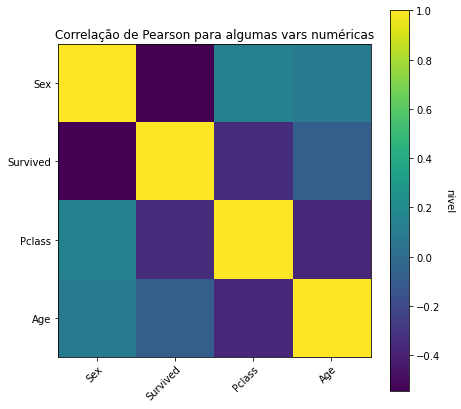

In [612]:
# Filtrando apenas algumas colunas:
columns = ['Sex','Survived', 'Pclass', 'Age']

# Calculando a correlação entre elas
corrs = df[['Sex','Survived', 'Pclass', 'Age']].corr().values


fig, ax = plt.subplots(figsize = [7,7])

# Criando a imagem da matriz de correalções
im = ax.imshow(corrs)


# Colocando os nomes das colunas no eixo x e y:
ax.set_xticks(np.arange(len(columns))) #define númeto de itens no eixo
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns) # nomeia os itens do eixo
ax.set_yticklabels(columns)

# Rotacionando os nomes das colunas para não ficar um nome sobre o outro
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Título do gráfico
ax.set_title("Correlação de Pearson para algumas vars numéricas")

# Criando a barrinha ao lado para legenda das cores:
cbar = ax.figure.colorbar(im, ax=ax) # im - cores, ax - itens do eixo
cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom") # label para a barra
plt.show()

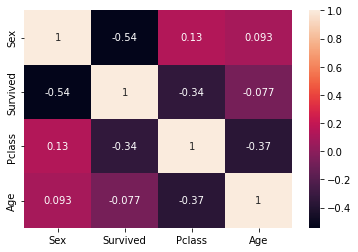

In [613]:
sns.heatmap(df[['Sex','Survived', 'Pclass', 'Age']].corr(), annot=True)
plt.show()

-----

-------

    
**Ex2**: 

OBS: Estude e rode o código que deixamos em anexo ao conteúdo do curso para resolver esse exercício.

Após rodar o código em anexo, faça um círculo branco no gráfico do conteúdo em anexo, indicando os pontos $(x1, x2)$ tais que $x1^2$ + $x2^2$ $\sim$ 10. Ou seja, pares $(x1, x2)$ cujo valor da f é próximo de 10.

Considere que "próximo" neste caso significa que o valor resultante da f não pode ser maior, em módulo do que 1. Isto é $-1<f(x) - 10 < 1$, ou seja,  $9 <f(x)<11$

<br>
<div>
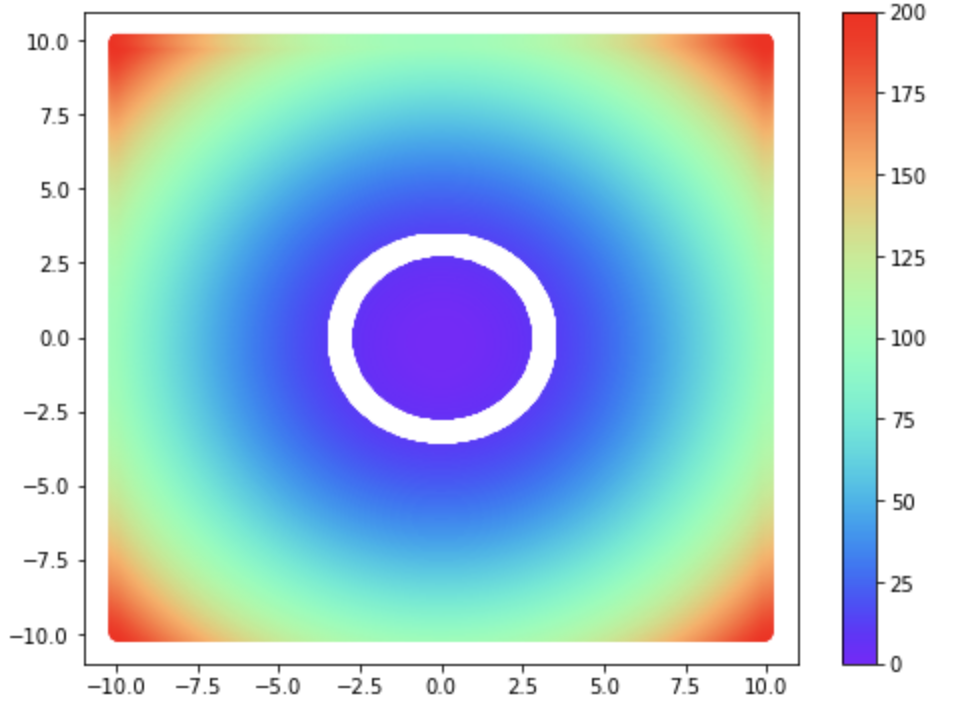
</div>

In [614]:
import numpy as np
import matplotlib.pyplot as plt

In [615]:
def f(x1, x2):
    return x1**2 + x2**2

In [616]:
def create_meshgrid(x1_lims, x2_lims):
    x1mesh, x2mesh = np.meshgrid(x1_lims, x2_lims)
    return np.c_[x1mesh.ravel(), x2mesh.ravel()]

In [617]:
x1_lims = np.arange(-10,10,0.02)
x2_lims = np.arange(-10,10,0.02)
mesh = create_meshgrid(x1_lims, x2_lims)

In [618]:
L = []
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    L.append(value_f)

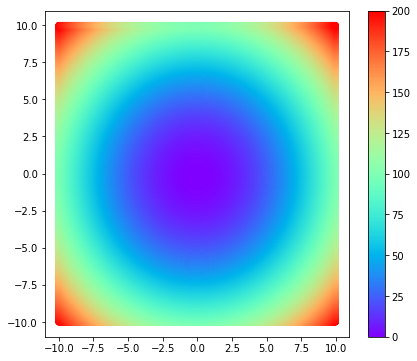

In [619]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.colorbar()
plt.show()

## TENTATIVA 1

In [620]:
x3_lims = np.arange(-2.5,2.5,0.02)
x4_lims = np.arange(-2.5,2.5,0.02)
mesh1 = create_meshgrid(x3_lims, x4_lims)

In [621]:
L1 = []
for v in mesh1:
    x3 = v[0]
    x4 = v[1]
    value_f = f(x3, x4)
    L1.append(value_f)

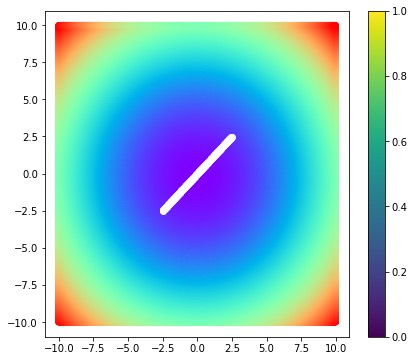

In [622]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.scatter(x3_lims, x4_lims, c = 'w')
plt.colorbar()
plt.show()

## TENTATIVA 2

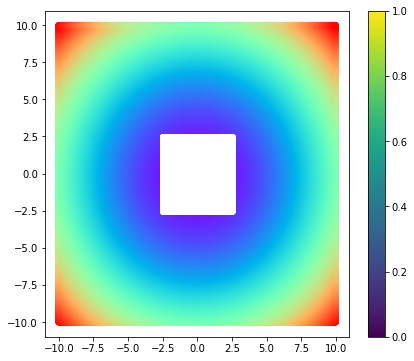

In [623]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.scatter(mesh1[:, 0], mesh1[:, 1], c = 'w')
plt.colorbar()
plt.show()

## INSERÇÃO DE CÍRCULO SEM O MESH
não consegui descobrir como fazer usando o mesh

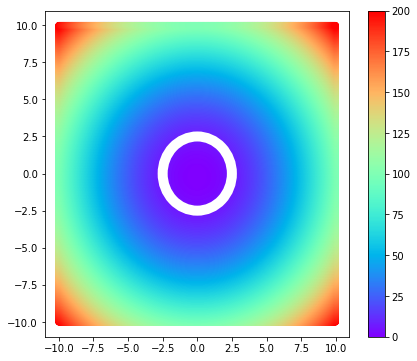

In [624]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)

# draw circle
centre_circle = plt.Circle((0, 0), 2.5, fill = False, linewidth=10, color='w')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.colorbar()
plt.show()

-----

-----

**Ex3**:

Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [625]:
import pandas as pd
df1 = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")
df1.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


---

1 - Qual o número de reclamações por Estado?

In [626]:
reclam_estado = pd.DataFrame(df1.UF.value_counts())
reclam_estado

,UF
SP,11882
PR,6140
RJ,4907
MG,4186
BA,2443
RS,1941
DF,1805
PE,1626
SC,1458
MA,1082


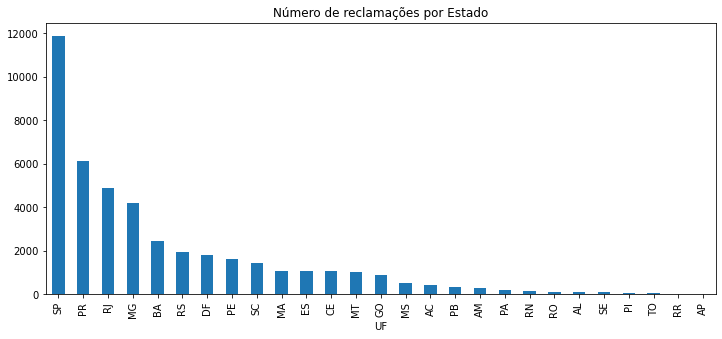

In [627]:
plt.figure(figsize=[12,5])
plt.title("Número de reclamações por Estado")
df1.groupby(['UF']).UF.count().sort_values(ascending=False).plot(kind='bar')
plt.show()

---

2 - Qual a quantidade de reclamações por sexo?

In [628]:
reclam_sexo = pd.DataFrame(df1.Sexo.value_counts())
reclam_sexo

,Sexo
M,27895
F,16092


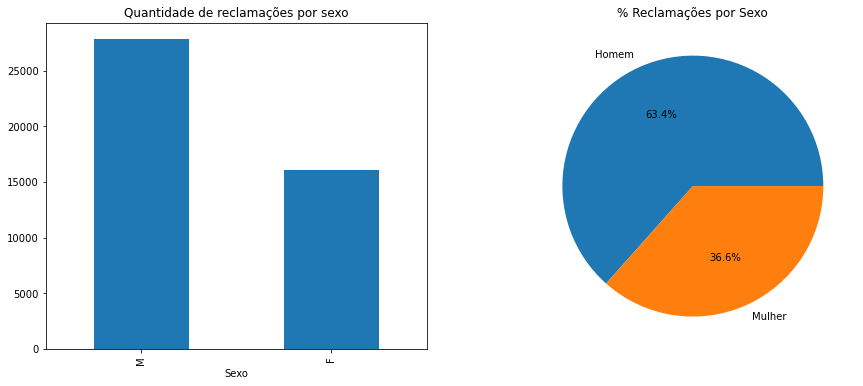

In [629]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title("Quantidade de reclamações por sexo")
df1.groupby(['Sexo']).Sexo.count().sort_values(ascending=False).plot(kind='bar')
plt.subplot(1,2,2)
plt.title("% Reclamações por Sexo")
plt.pie(df1['Sexo'].value_counts(), labels=['Homem', 'Mulher'], autopct='%1.1f%%')
plt.show()

---

3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

In [630]:
# Verificando dados faltantes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43987 entries, 0 to 43986
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gestor                  43987 non-null  object 
 1   Canal de Origem         43987 non-null  object 
 2   Região                  43987 non-null  object 
 3   UF                      43987 non-null  object 
 4   Cidade                  43987 non-null  object 
 5   Sexo                    43987 non-null  object 
 6   Faixa Etária            43987 non-null  object 
 7   Ano Abertura            43987 non-null  int64  
 8   Mês Abertura            43987 non-null  int64  
 9   Data Abertura           43987 non-null  object 
 10  Hora Abertura           43987 non-null  object 
 11  Data Resposta           41961 non-null  object 
 12  Hora Resposta           41961 non-null  object 
 13  Data Análise            1953 non-null   object 
 14  Hora Análise            1953 non-null 

In [631]:
# Verificando dados faltantes
print("\nTotal de nulos por variável:\n", df1.isnull().sum().sort_values(ascending=False))


Total de nulos por variável:
 Hora Análise              42034
Prazo Analise Gestor      42034
Data Análise              42034
Análise da Recusa         41941
Hora Recusa               41921
Data Recusa               41921
Nota do Consumidor        15360
Data Resposta              2026
Tempo Resposta             2026
Hora Resposta              2026
Avaliação Reclamação       1834
Assunto                       0
Grupo Problema                0
Problema                      0
Gestor                        0
Segmento de Mercado           0
Como Comprou Contratou        0
Procurou Empresa              0
Respondida                    0
Situação                      0
Edição de Conteúdo            0
Interação do Gestor           0
Área                          0
Prazo Resposta                0
Nome Fantasia                 0
Canal de Origem               0
Hora Finalização              0
Data Finalização              0
Hora Abertura                 0
Data Abertura                 0
Mês Abert

In [632]:
# Excluindo linhas com dados faltantes
df2 = df1.dropna()

In [633]:
# Verificando se a limpeza de dados funcionou
print("\nTotal de nulos por variável:\n", df2.isnull().sum().sort_values(ascending=False))


Total de nulos por variável:
 Gestor                    0
Como Comprou Contratou    0
Tempo Resposta            0
Nome Fantasia             0
Segmento de Mercado       0
Área                      0
Assunto                   0
Grupo Problema            0
Problema                  0
Procurou Empresa          0
Canal de Origem           0
Respondida                0
Situação                  0
Avaliação Reclamação      0
Nota do Consumidor        0
Análise da Recusa         0
Edição de Conteúdo        0
Interação do Gestor       0
Prazo Analise Gestor      0
Prazo Resposta            0
Hora Finalização          0
Data Finalização          0
Região                    0
UF                        0
Cidade                    0
Sexo                      0
Faixa Etária              0
Ano Abertura              0
Mês Abertura              0
Data Abertura             0
Hora Abertura             0
Data Resposta             0
Hora Resposta             0
Data Análise              0
Hora Análise     

In [634]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 10 to 42917
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gestor                  163 non-null    object 
 1   Canal de Origem         163 non-null    object 
 2   Região                  163 non-null    object 
 3   UF                      163 non-null    object 
 4   Cidade                  163 non-null    object 
 5   Sexo                    163 non-null    object 
 6   Faixa Etária            163 non-null    object 
 7   Ano Abertura            163 non-null    int64  
 8   Mês Abertura            163 non-null    int64  
 9   Data Abertura           163 non-null    object 
 10  Hora Abertura           163 non-null    object 
 11  Data Resposta           163 non-null    object 
 12  Hora Resposta           163 non-null    object 
 13  Data Análise            163 non-null    object 
 14  Hora Análise            163 non-null   

In [635]:
# Tabela de correlação dos atributos numéricos
df2.corr()

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
Ano Abertura,NaN,NaN,NaN,NaN,NaN,NaN
Mês Abertura,NaN,1.000000,0.207576,0.059400,0.048086,NaN
Prazo Analise Gestor,NaN,0.207576,1.000000,0.136578,-0.070442,NaN
Tempo Resposta,NaN,0.059400,0.136578,1.000000,-0.309022,NaN
Nota do Consumidor,NaN,0.048086,-0.070442,-0.309022,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN


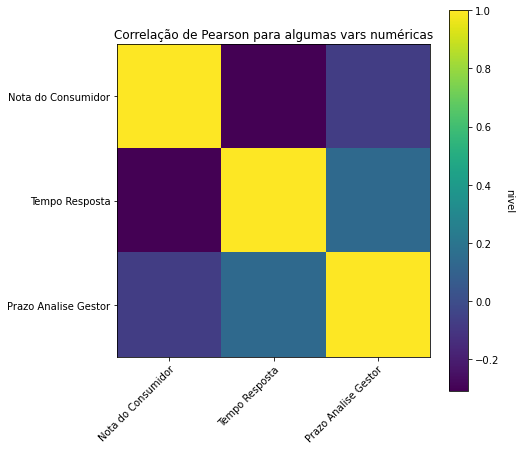

In [636]:
# Filtrando apenas algumas colunas:
columns = ['Nota do Consumidor','Tempo Resposta', 'Prazo Analise Gestor']

# Calculando a correlação entre elas
corrs = df2[['Nota do Consumidor','Tempo Resposta', 'Prazo Analise Gestor']].corr().values


fig, ax = plt.subplots(figsize = [7,7])

# Criando a imagem da matriz de correalções
im = ax.imshow(corrs)


# Colocando os nomes das colunas no eixo x e y:
ax.set_xticks(np.arange(len(columns))) #define númeto de itens no eixo
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns) # nomeia os itens do eixo
ax.set_yticklabels(columns)

# Rotacionando os nomes das colunas para não ficar um nome sobre o outro
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Título do gráfico
ax.set_title("Correlação de Pearson para algumas vars numéricas")

# Criando a barrinha ao lado para legenda das cores:
cbar = ax.figure.colorbar(im, ax=ax) # im - cores, ax - itens do eixo
cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom") # label para a barra
plt.show()

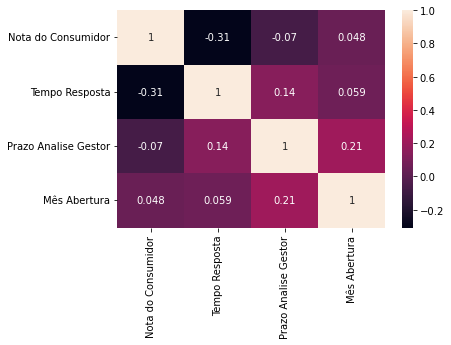

In [637]:
sns.heatmap(df2[['Nota do Consumidor','Tempo Resposta', 'Prazo Analise Gestor', 'Mês Abertura']].corr(), annot=True)
plt.show()

---

4 - Proporção de reclamações registradas e não respondidas.

In [638]:
perc_reclam = pd.DataFrame(df1.Respondida.value_counts())
perc_reclam['Perc_Respondida'] = round(perc_reclam.Respondida / perc_reclam.Respondida.sum(),2)
perc_reclam

,Respondida,Perc_Respondida
S,41961,0.95
N,2026,0.05


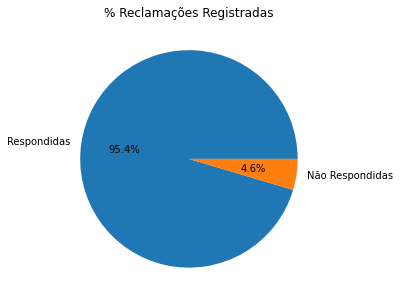

In [639]:
plt.figure(figsize=(10,5))
plt.title("% Reclamações Registradas")
plt.pie(df1['Respondida'].value_counts(), labels=['Respondidas', 'Não Respondidas'], autopct='%1.1f%%')
plt.show()

---

5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. 
Que outros tipos de pergunta e análises você entende que poderiam ser feitas? 
Acrescente mais duas perguntas feitas por você, bem como suas análises para respondê-las. 

 > 5.1 Ranking das 5 Áreas (segmentos) com mais reclamações

In [646]:
# ranking de reclamação por Área (segmento)
reclam_area = pd.DataFrame(df1['Área'].value_counts())
reclam_area

,Área
Telecomunicações,19965
Serviços Financeiros,9364
Produtos de Telefonia e Informática,7047
Produtos Eletrodomésticos e Eletrônicos,3656
Demais Produtos,2312
Transportes,477
Demais Serviços,402
Saúde,257
Turismo/Viagens,243
Alimentos,116


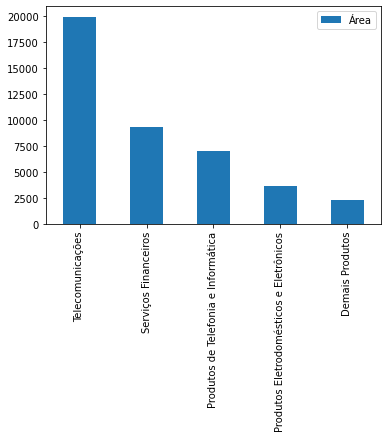

In [671]:
reclam_area[:5].plot(kind='bar')
plt.show()

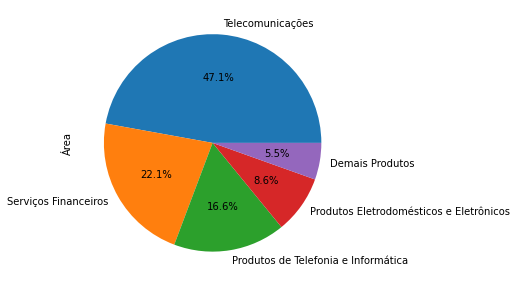

In [669]:
plot = reclam_area[:5].plot.pie(y='Área', autopct='%1.1f%%', figsize=(15, 5)).get_legend().remove()

----

 > 5.2 Ranking das 3 Faixas Etárias que mais reclamam

In [675]:
# ranking de reclamação por Faixa Etária
reclam_idade = pd.DataFrame(df1['Faixa Etária'].value_counts())
reclam_idade

,Faixa Etária
entre 31 a 40 anos,16741
entre 21 a 30 anos,9154
entre 41 a 50 anos,8364
entre 51 a 60 anos,5542
entre 61 a 70 anos,2973
mais de 70 anos,1199
até 20 anos,14


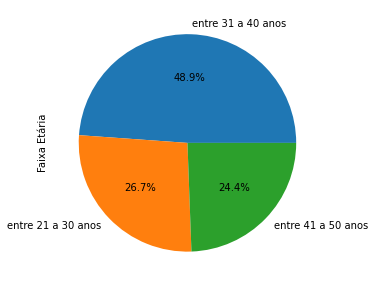

In [676]:
plot = reclam_idade[:3].plot.pie(y='Faixa Etária', autopct='%1.1f%%', figsize=(15, 5)).get_legend().remove()